# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data\pokemon.csv")

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Descriptive Statistics

In [4]:
df.shape     # 801 pokemons, 41 attributes

(801, 41)

In [5]:
df.columns.values   # columns

array(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'], dtype=object)

In [6]:
df.sample(5).T

,24,680,230,46,574
abilities,"['Static', 'Lightningrod']",['Stance Change'],"['Pickup', 'Sand Veil']","['Effect Spore', 'Dry Skin', 'Damp']","['Frisk', 'Competitive', 'Shadow Tag']"
against_bug,1.0,0.25,1.0,2.0,2.0
against_dark,1.0,2.0,1.0,1.0,2.0
against_dragon,1.0,0.5,1.0,1.0,1.0
against_electric,0.5,1.0,0.0,0.5,1.0
against_fairy,1.0,0.5,1.0,1.0,1.0
against_fight,1.0,0.0,1.0,0.5,0.5
against_fire,1.0,2.0,1.0,4.0,1.0
against_flying,0.5,0.5,1.0,4.0,1.0
against_ghost,1.0,2.0,1.0,1.0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


# Data Preprocessing

### Reordering name attribute

In [9]:
df.insert(0, 'name', df.pop('name'))   # done to easily identify names

In [10]:
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Null Values

In [11]:
df.isnull().sum()


name                   0
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


<b>"height_m"</b> and <b>"weight_kg</b> has 20-20 Null Values each.<p>
<b>"percentage_male"</b> has 98 Null Values<p>
<b>"type2"</b> has 384 missing values

### Data Imputation

In [12]:
# Replacing missing height_m and weight_kg values with mode of them
df["height_m"].fillna(df["height_m"].mean(), inplace=True)
df["weight_kg"].fillna(df["weight_kg"].mean(), inplace=True)

# Replacing the missing values in percentage_male with None
df["percentage_male"].fillna('None', inplace=True)

# Replacing the missing values in type 2 with NUll
df["type2"].fillna('None', inplace=True)


In [13]:
df.isnull().sum()


name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

### capture_rate attribute

capture_rate is an object attribute but has numerical values. Now, lets check the capture_rate attribute.

In [14]:
for i in df.capture_rate:
    print(i, end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

In [15]:
df[df["capture_rate"]=="30 (Meteorite)255 (Core)"]

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,Minior,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,...,None,774,100,60,120,rock,flying,40.0,7,0


As we can see in the output values there is one value <b>"30 (Meteorite)255 (Core)"</b>. We know its a rock/fly type pokemon, therefore, we will replace it with "Meteorite" capture_rate of 30.

In [16]:
# replacing with 30
df["capture_rate"].replace({"30 (Meteorite)255 (Core)": "30"}, inplace=True)

# converting into integer type attribute
df["capture_rate"] = df["capture_rate"].astype('int')
df["capture_rate"].dtype

dtype('int64')

### Dropping unncessary attributes

We will drop off 3 unncessary columns: 
1. japenese_name
2. pokedex_number
3. percentage_male

In [17]:
df.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 

### Combining number of abilities and type1 & type2

In [18]:
# adding total abilities that a pokemon has
df["tot_abilities"] = df.apply(lambda x: len(x["abilities"]), axis=1)

In [19]:
# merging type1 and type2 and adding into new column=> type, 
# and renaming type1 to primary and type2 to secondary
df['type'] =  df.apply(lambda x: x['type1'] if pd.isnull(x['type2']) else f'{x["type1"]}_{x["type2"]}', axis=1)
df.rename(columns = {'type1':'primary type', 'type2':'secondary type'}, inplace = True)

# Checking the final shape of df before moving into visualizations
df.shape

(801, 40)

# Data Analysis 

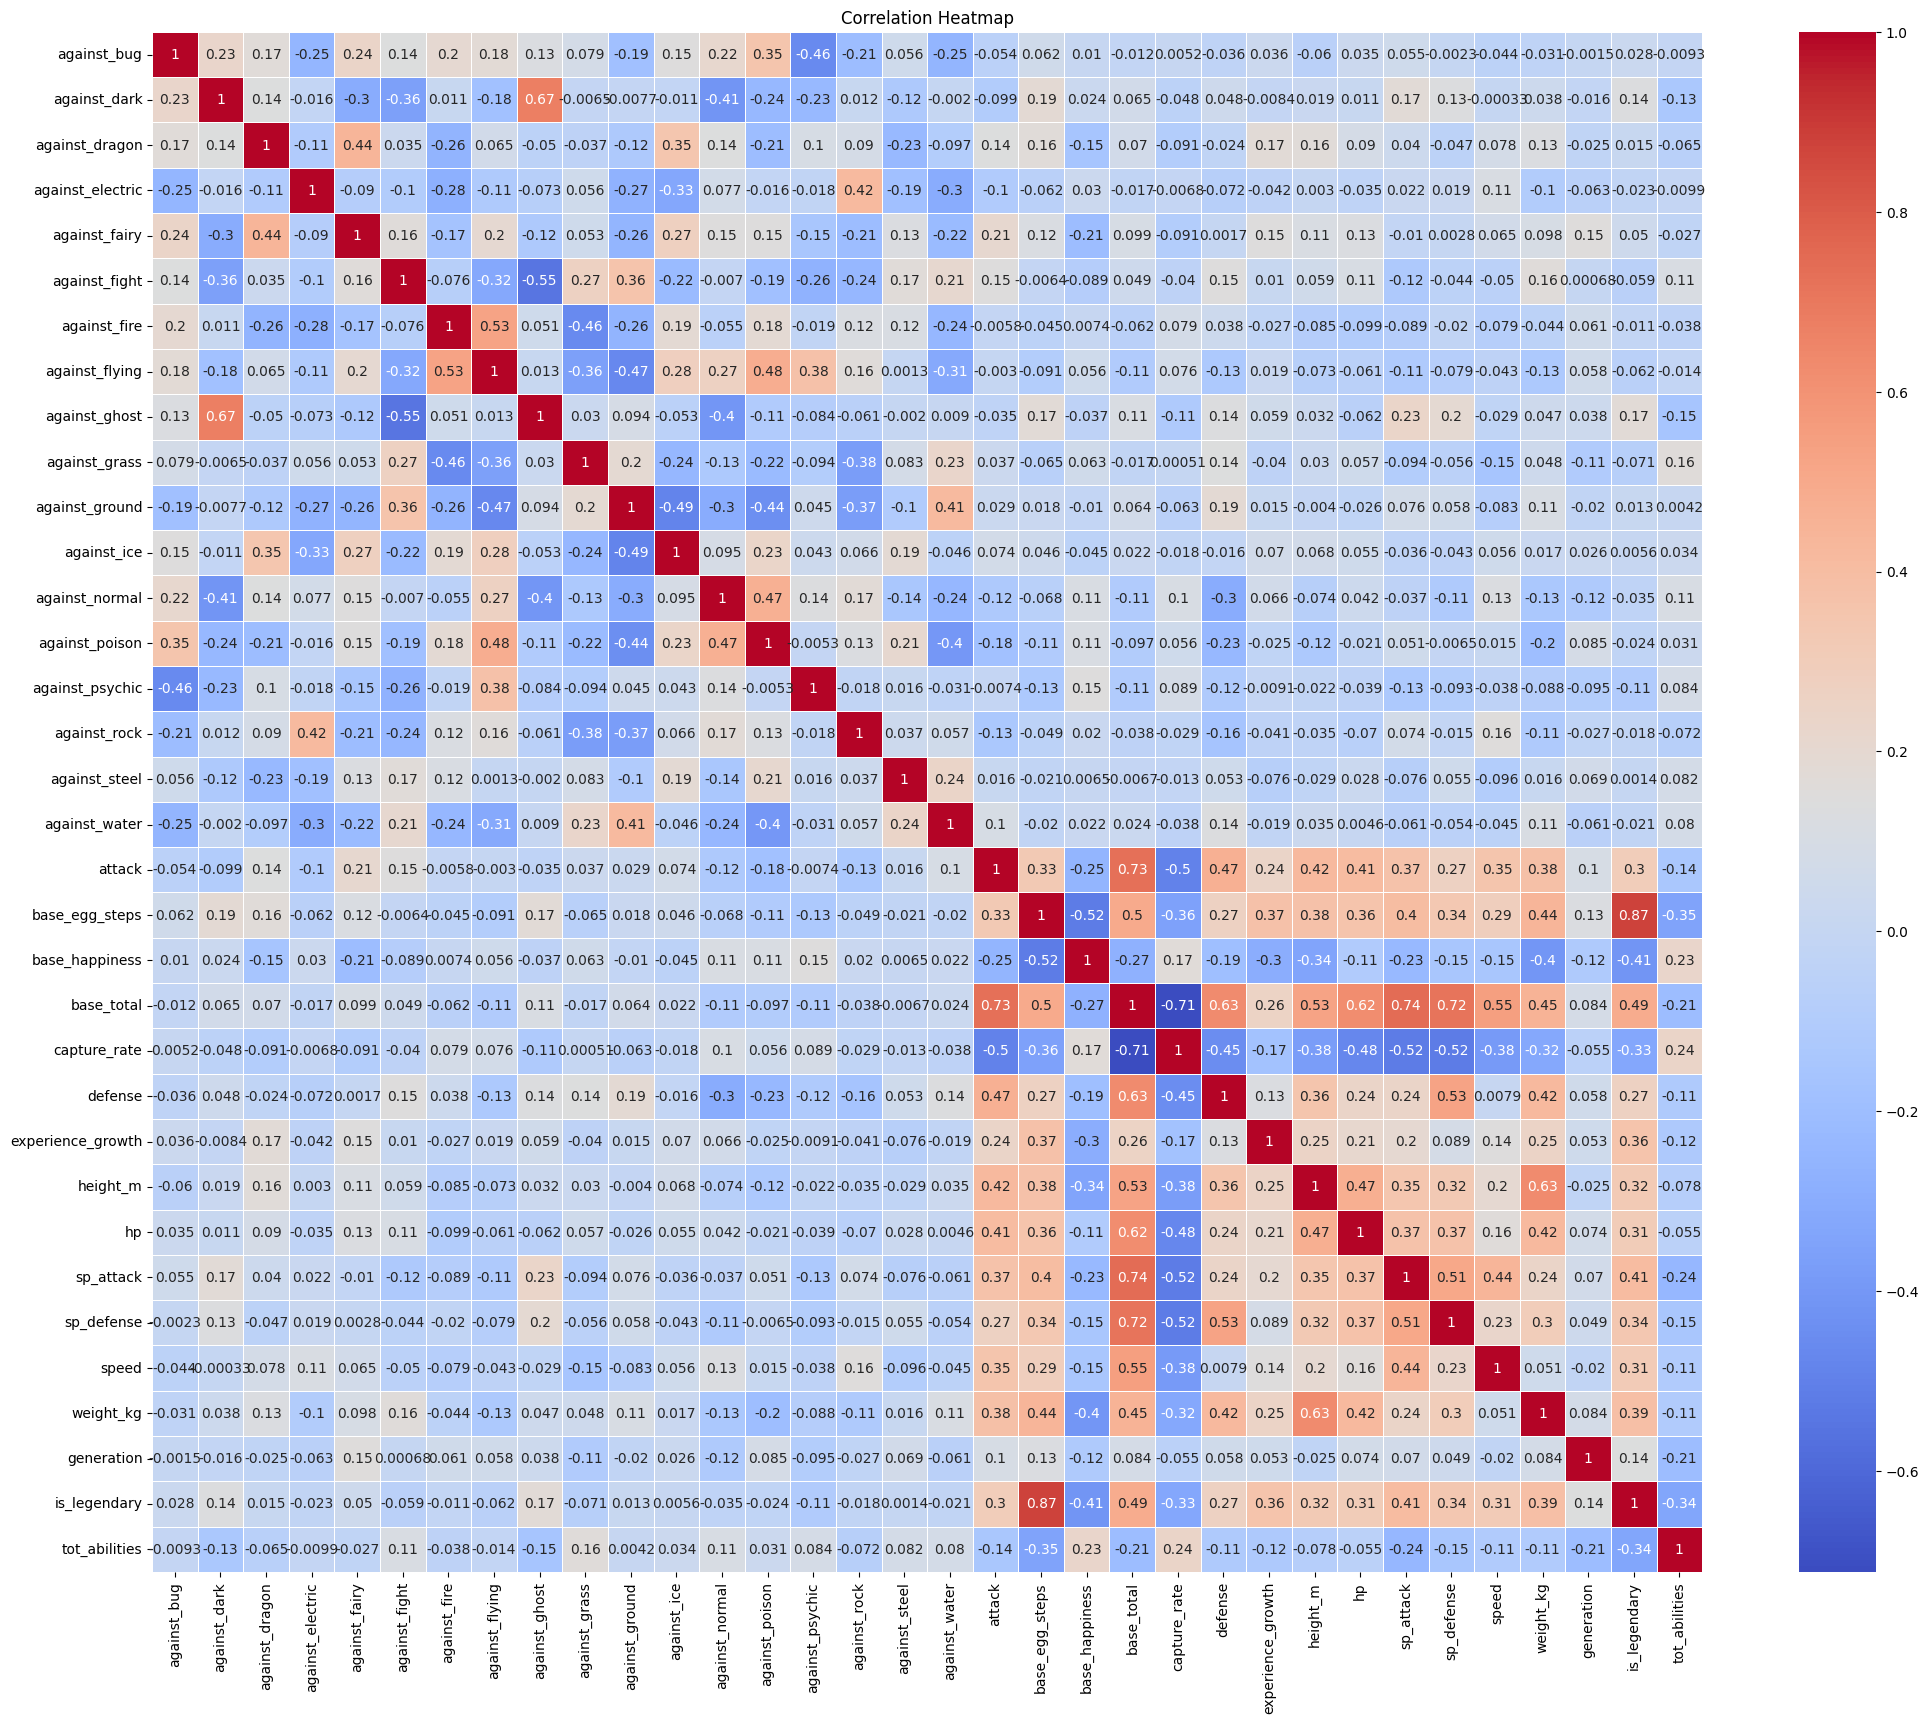

In [20]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

Lets distribute the correlation into two main parts for proper understanding =>

In [21]:
against=[]
rest=[]
for i in df.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

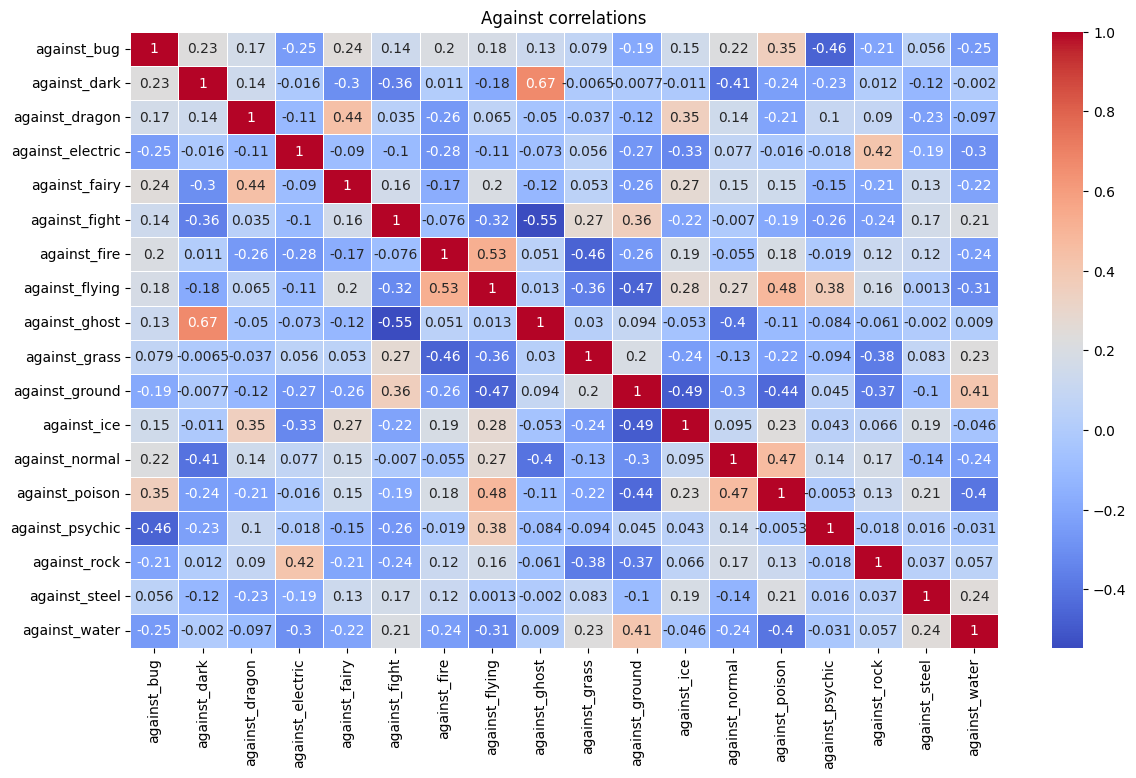

In [22]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[against].corr(), annot=True, cmap='coolwarm', linewidths=0.5).set_title("Against correlations")
plt.show()

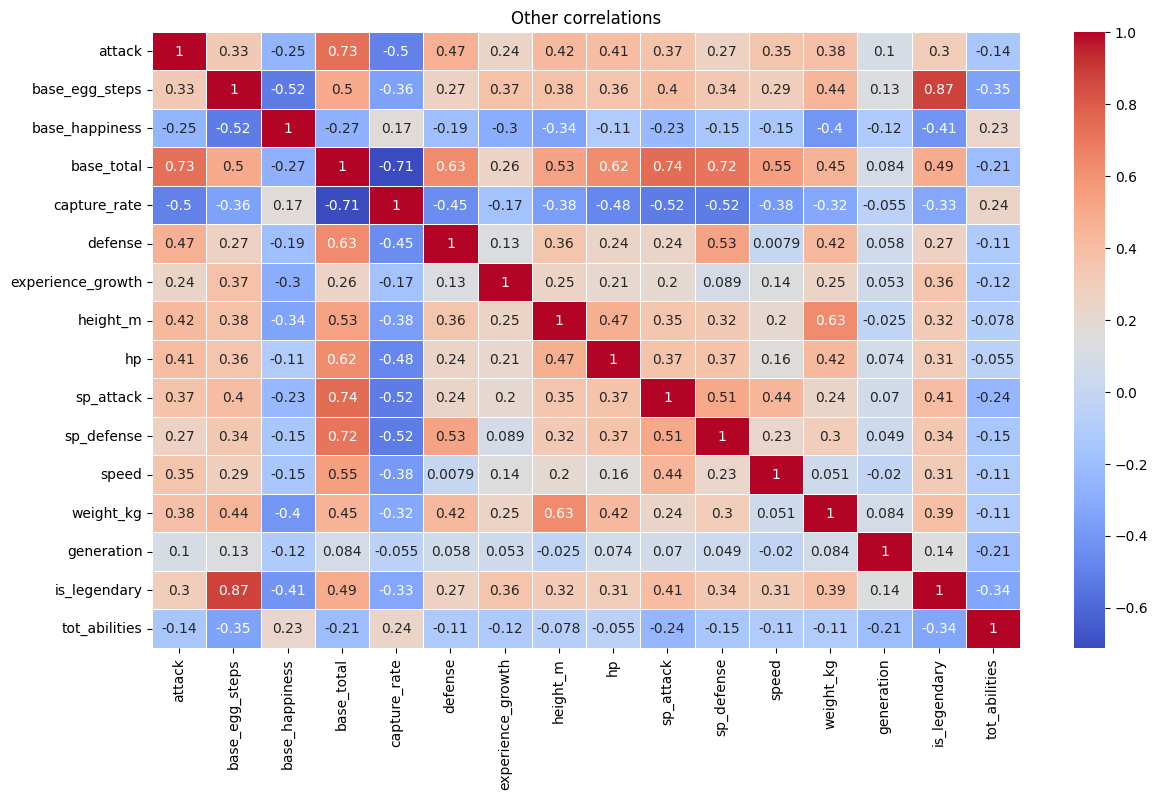

In [23]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[rest].corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Other correlations")
plt.show()

Now we can see from the above heatmap, following relations:

* <b>base_total</b> has good correlation with <b><i>attack, defense, sp_attack, and sp_defense</i>.</b>
* <b>base_egg_steps</b> have a huge correlation with <b><i>is_legendary</b></i> attribute.
* <b>weight_kg</b> is also very correlated with <b><i>height_m</b></i>

# Visualizations

### 1. Count of Pokemons per generation

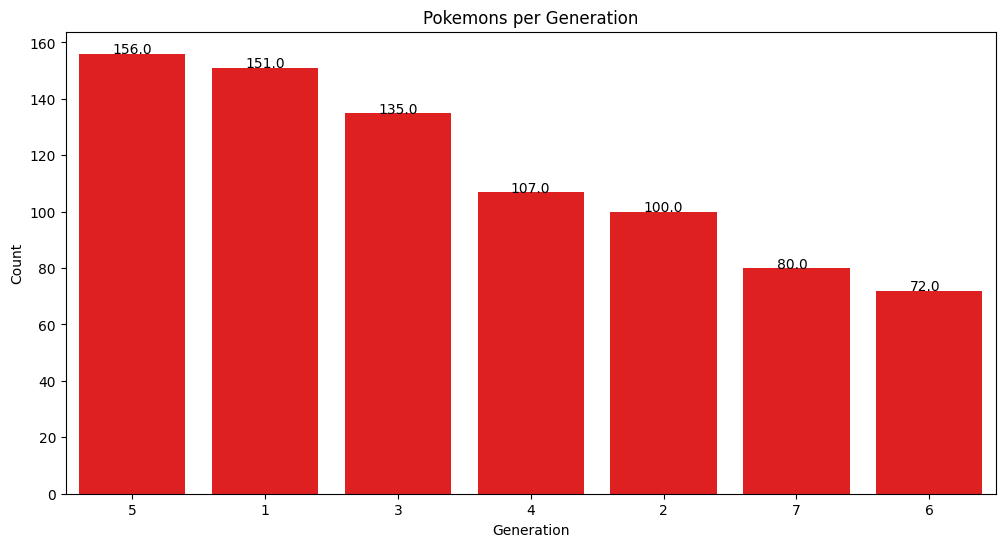

In [24]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=df,order=df['generation'].value_counts().index,color='red')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

### 2. Distribution of Primary and Secondary Types of pokemon

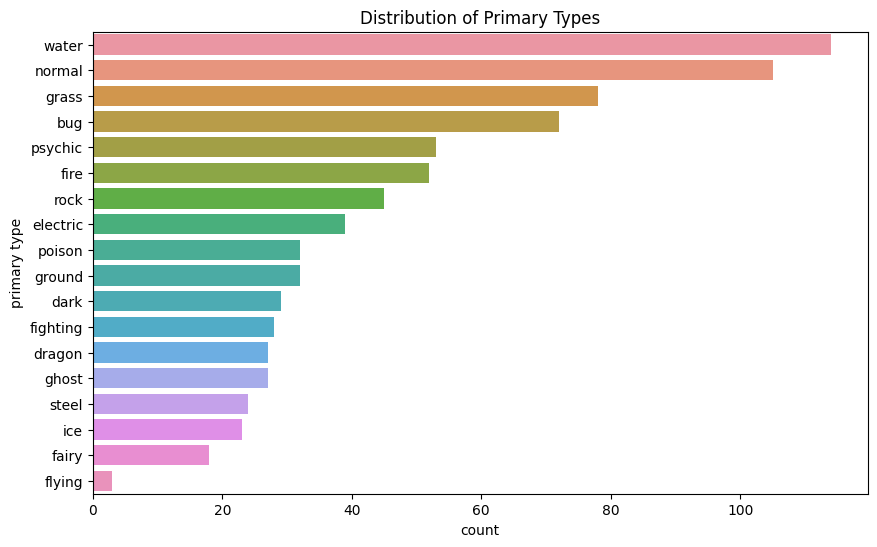

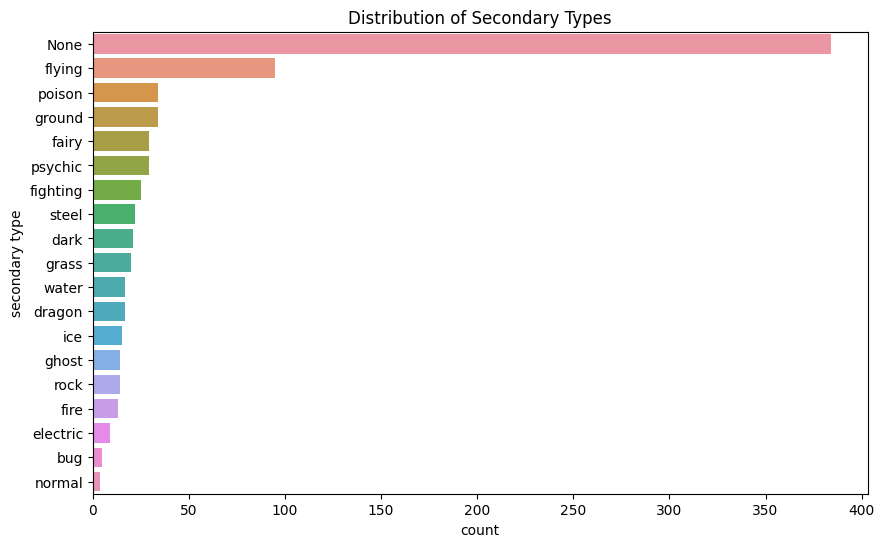

In [25]:
# Bar charts for primary type
plt.figure(figsize=(10, 6))
sns.countplot(y='primary type', data=df, order=df['primary type'].value_counts().index)
plt.title('Distribution of Primary Types')
plt.show()

# Bar charts for secondary type
plt.figure(figsize=(10, 6))
sns.countplot(y='secondary type', data=df, order=df['secondary type'].value_counts().index)
plt.title('Distribution of Secondary Types')
plt.show()

<i>From the above plot, we can derive following conclusions:
* Most occured pokemon type
    * Primary type = Water Type
    * Secondary type = None; followed by flying type
* Least occured pokemon type
    * Primary type = flying
    * Secondary type = normal

### 3. Types of Pokemons in each Generation

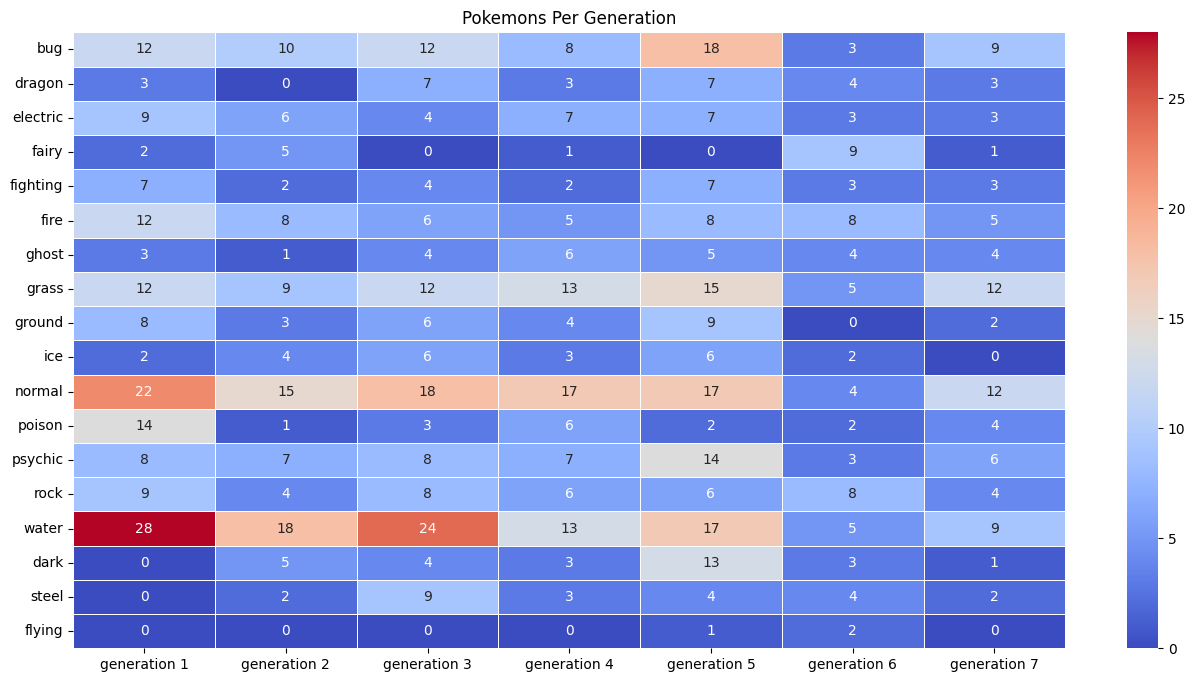

In [26]:
primary_type_generation_group = df.groupby(['generation', 'primary type'])['name'].count().to_frame().reset_index()
primary_type_generation_group.rename(columns={'name' : 'name_count'}, inplace=True)
primary_type_generation_dict  = {}
for generation in list(primary_type_generation_group['generation'].unique()):
    current_generation = []
    for p_type in primary_type_generation_group['primary type'].unique():
        try:
            current_generation.append(
                primary_type_generation_group.loc[(primary_type_generation_group['generation']==generation) 
                                        & (primary_type_generation_group['primary type'] == p_type)]['name_count'].values[0])
        except IndexError:
            current_generation.append(0)
    primary_type_generation_dict[f'generation {generation}'] = current_generation

p_type_by_generation = pd.DataFrame(primary_type_generation_dict, index= primary_type_generation_group['primary type'].unique())
fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_type_by_generation, annot=True, cmap='coolwarm', linewidths=0.5).set_title('Pokemons Per Generation')
plt.show()

<i>As we can see that, not each generation have all types of pokemons:<br>
And we can derive following conlusions from above::

* Only Gen 5 & 6 have flying type pokemons
* In Gen 1, there is no dark, steel & flying type pokemons
* In Gen 1, 2, & 3, water type pokemons are most common
* In Gen 4, normal type pokemons are most common
* In Gen 5, bug type pokemons are most common
* In Gen 6, fairy type pokemons are most common
* In Gen 7, normal & grass type pokemons are most common

### 4. Easiest / Hardest Pokemon Type to catch

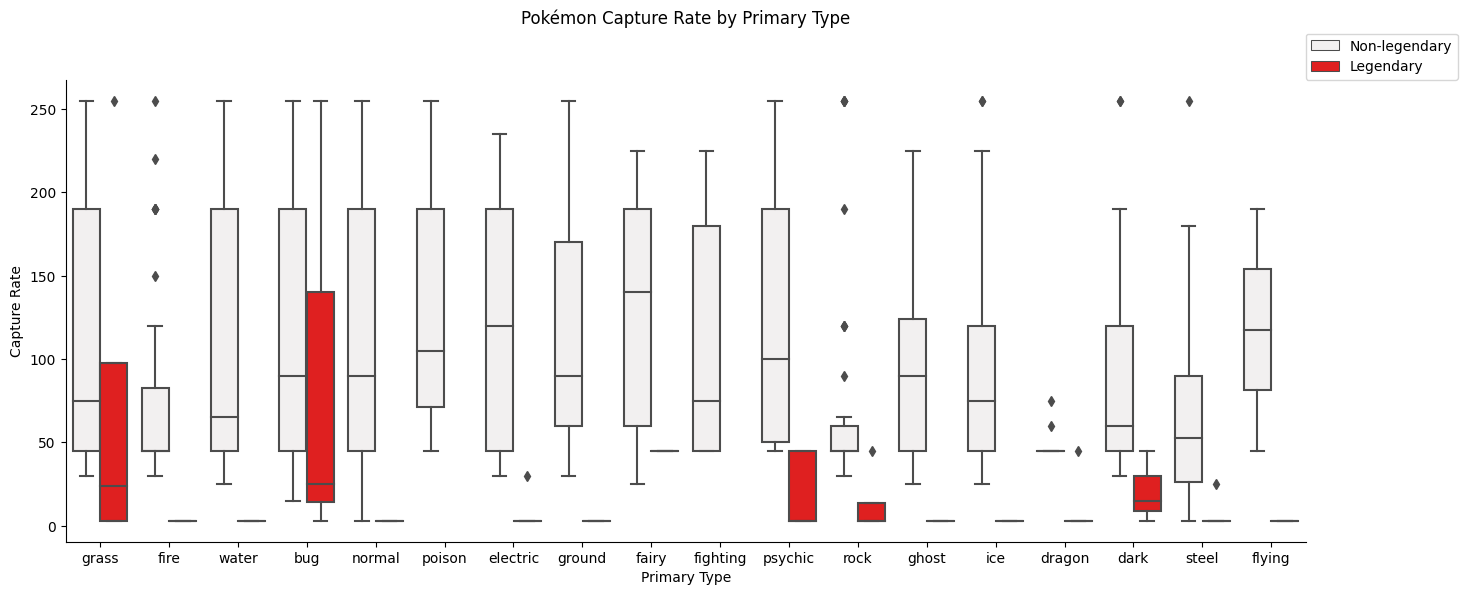

In [27]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='primary type',y='capture_rate', hue='is_legendary', data = df, color="red")

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Primary Type', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

<i>The easiest pokemon type to catch is <b>"fairy"</b> and hardest to catch is <b>"dragon"</b> type.<br>
It is also hard to catch<b> "rock"</b> and<b> "fire"</b> type pokemons. <p>
In legendary pokemons, easiest to catch are from<b> "bug" </b>and<b> "grass"</b> types.

### 5. How Speed correlate with various base stats?

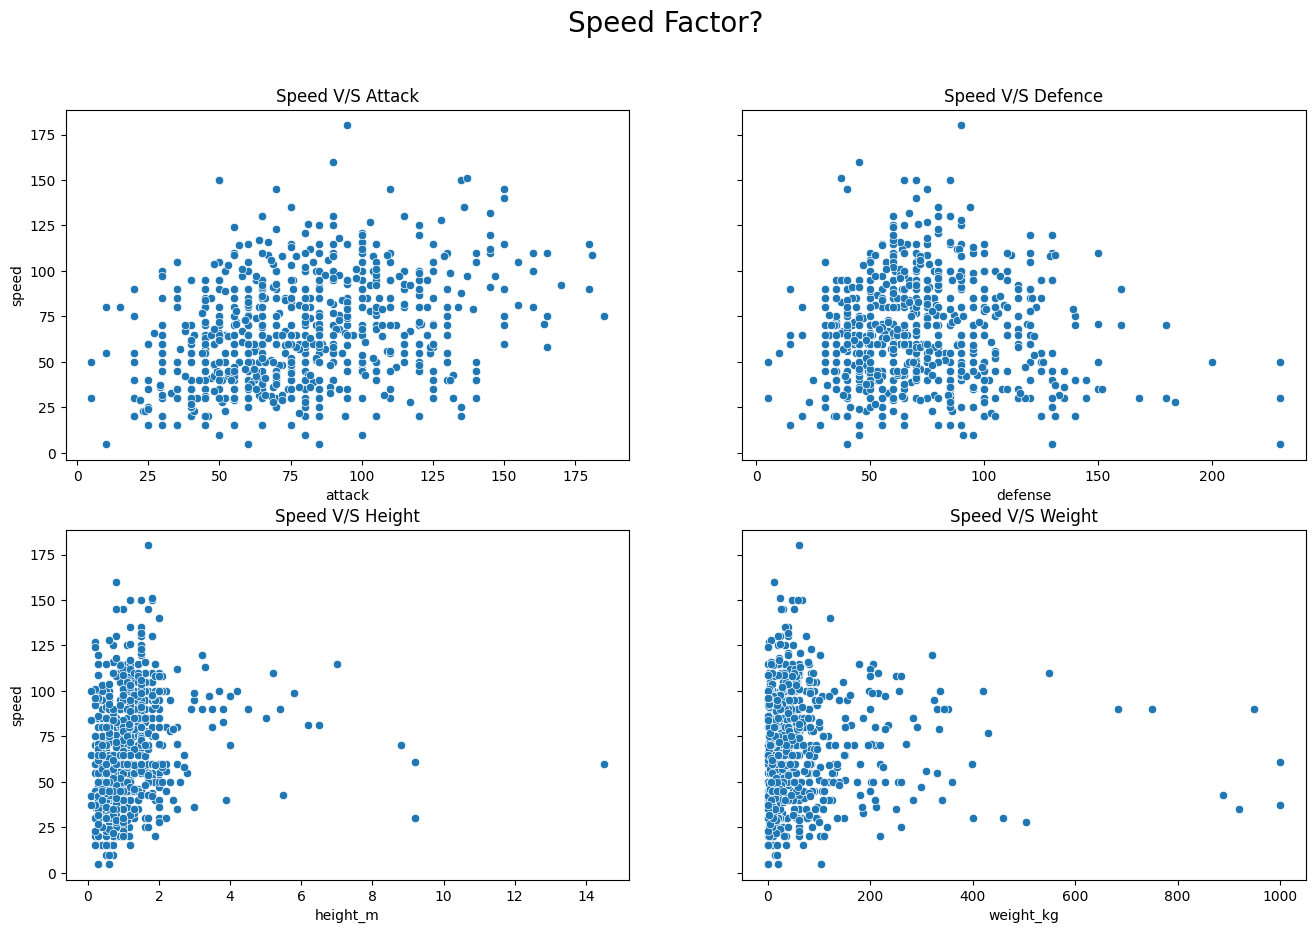

In [28]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='attack', y='speed', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Attack")
sns.scatterplot(x='defense', y='speed', data=df, ax=axes[0, 1])
axes[0,1].set_title("Speed V/S Defence")
sns.scatterplot(x='height_m', y='speed', data=df, ax=axes[1, 0])
axes[1,0].set_title("Speed V/S Height")
sns.scatterplot(x='weight_kg', y='speed', data=df, ax=axes[1, 1])
axes[1,1].set_title("Speed V/S Weight")
fig.suptitle("Speed Factor?", size=20)
plt.show()

<i>Insights from the above plots:<p>
* For most pokemons, Attack capacity slightly depends on its speed 
* For most pokemons, Defense also slightly depends on its speed
* Height of pokemons highly affects the speed (Less Height --> High speed)
* Weight of pokemons also affects the speed (Less Weight --> High speed)

### 6. How Height correlate with various base stats?

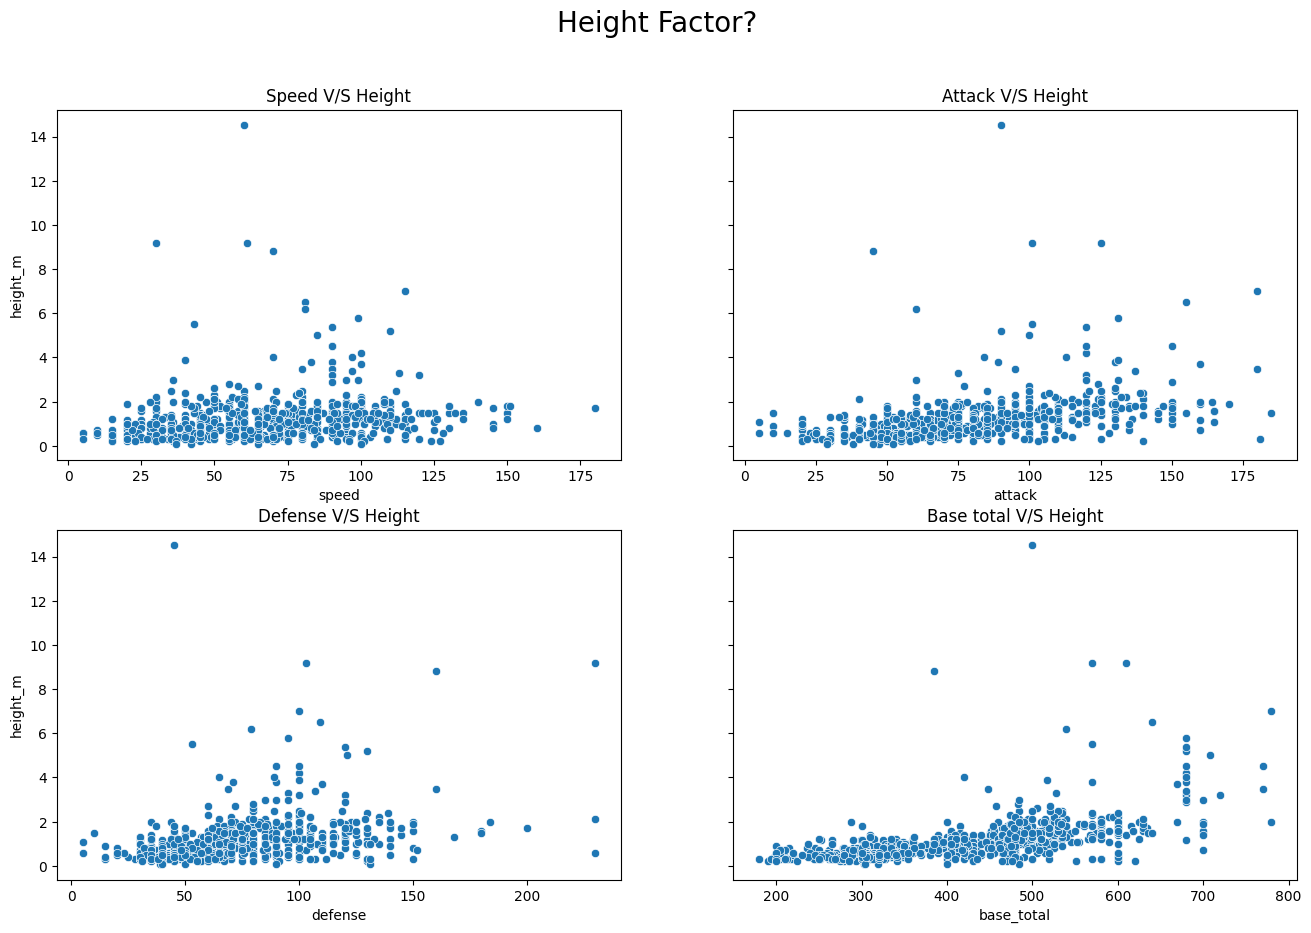

In [29]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='speed', y='height_m', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Height")
sns.scatterplot(x='attack', y='height_m', data=df, ax=axes[0, 1])
axes[0,1].set_title("Attack V/S Height")
sns.scatterplot(x='defense', y='height_m', data=df, ax=axes[1, 0])
axes[1,0].set_title("Defense V/S Height")
sns.scatterplot(x='base_total', y='height_m', data=df, ax=axes[1, 1])
axes[1,1].set_title("Base total V/S Height")
fig.suptitle("Height Factor?", size=20)
plt.show()

<i>Insights from the above plots:<p>
* Height of pokemons highly affects the speed (Less Height --> High speed)
* Height also highly affects attack capacity (less height --> high attack power)
* For most pokemons, Defense moderately correlates to Height
* Also, we can see that some pokemons with moderate height have high base total

### 7. How Weight correlate with various base stats?

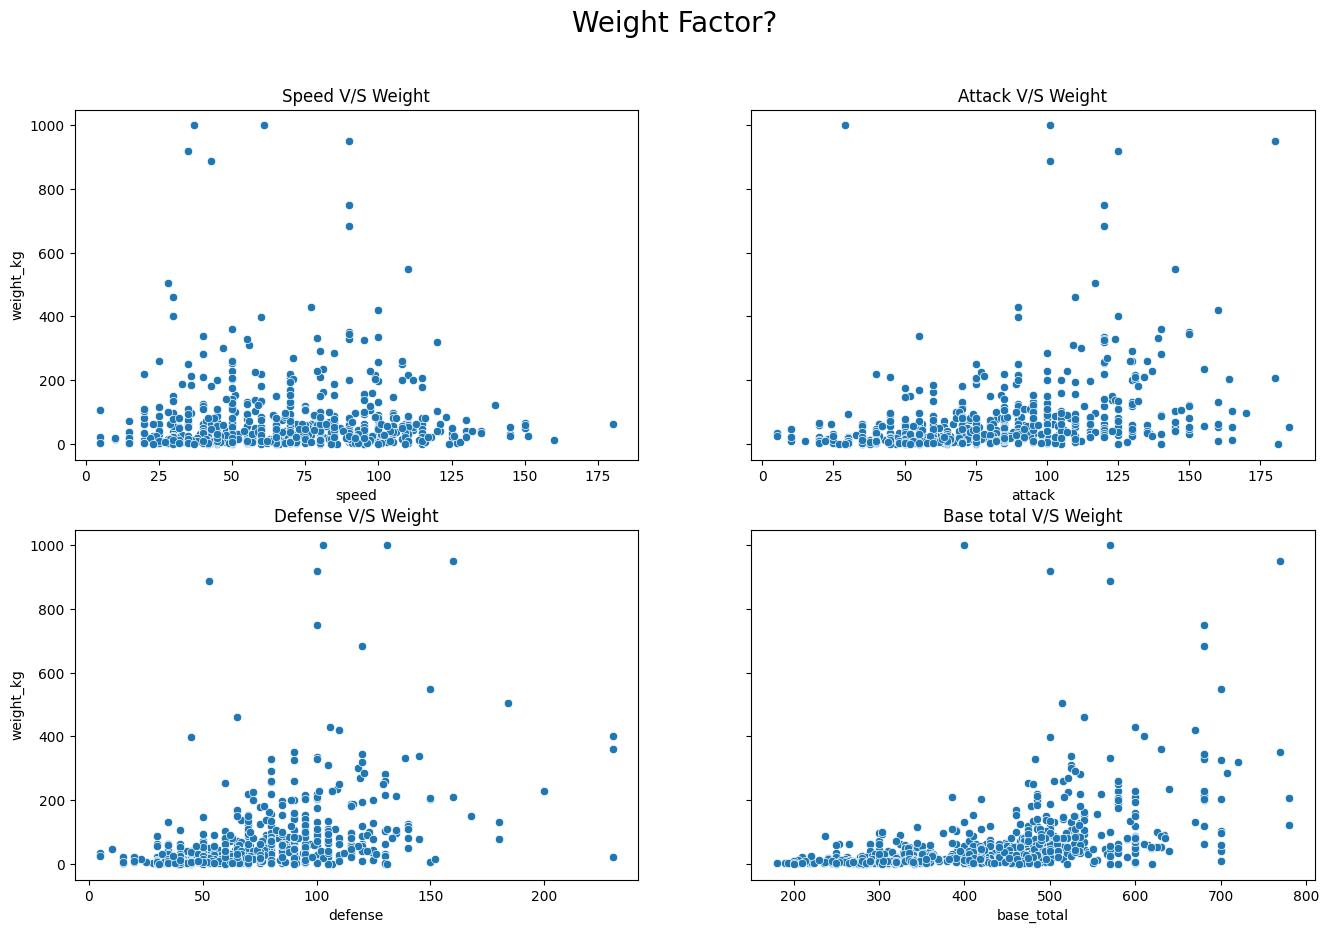

In [30]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='speed', y='weight_kg', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Weight")
sns.scatterplot(x='attack', y='weight_kg', data=df, ax=axes[0, 1])
axes[0,1].set_title("Attack V/S Weight")
sns.scatterplot(x='defense', y='weight_kg', data=df, ax=axes[1, 0])
axes[1,0].set_title("Defense V/S Weight")
sns.scatterplot(x='base_total', y='weight_kg', data=df, ax=axes[1, 1])
axes[1,1].set_title("Base total V/S Weight")
fig.suptitle("Weight Factor?", size=20)
plt.show()

<i>Insights from the above plots:<p>
* High-weight pokemons are slower, while low-weight ones are faster. Some high-weight Pokemon have more speed, likely flying types.
* Heavyweight pokemons have better attack power,
* Moderate weight can increase defense strength
* A strong base total, weighing 100-200kgs, signifies a pokemon's strength.

### 8. Strongest Pokemon

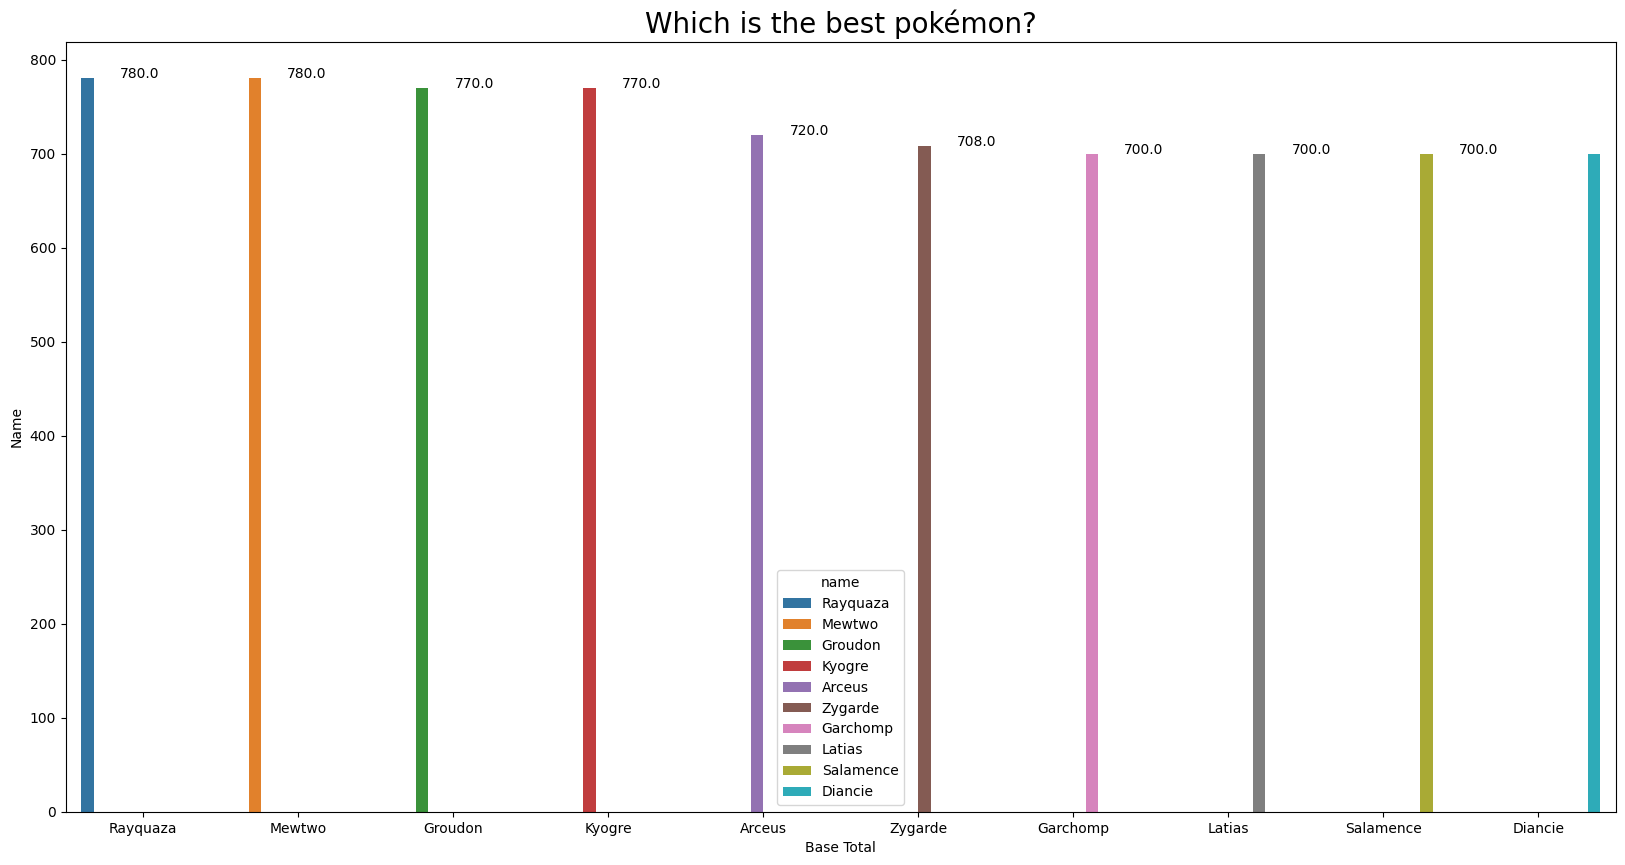

In [31]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v', hue=top10_pokemon_base_total["name"])
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<i>SO, the strongest pokemons being <b>Mewtwo, Rayquaza</b>, followed by <b>Groudon, Kyogre, </b>and others.

### 9. Weakest Pokemon

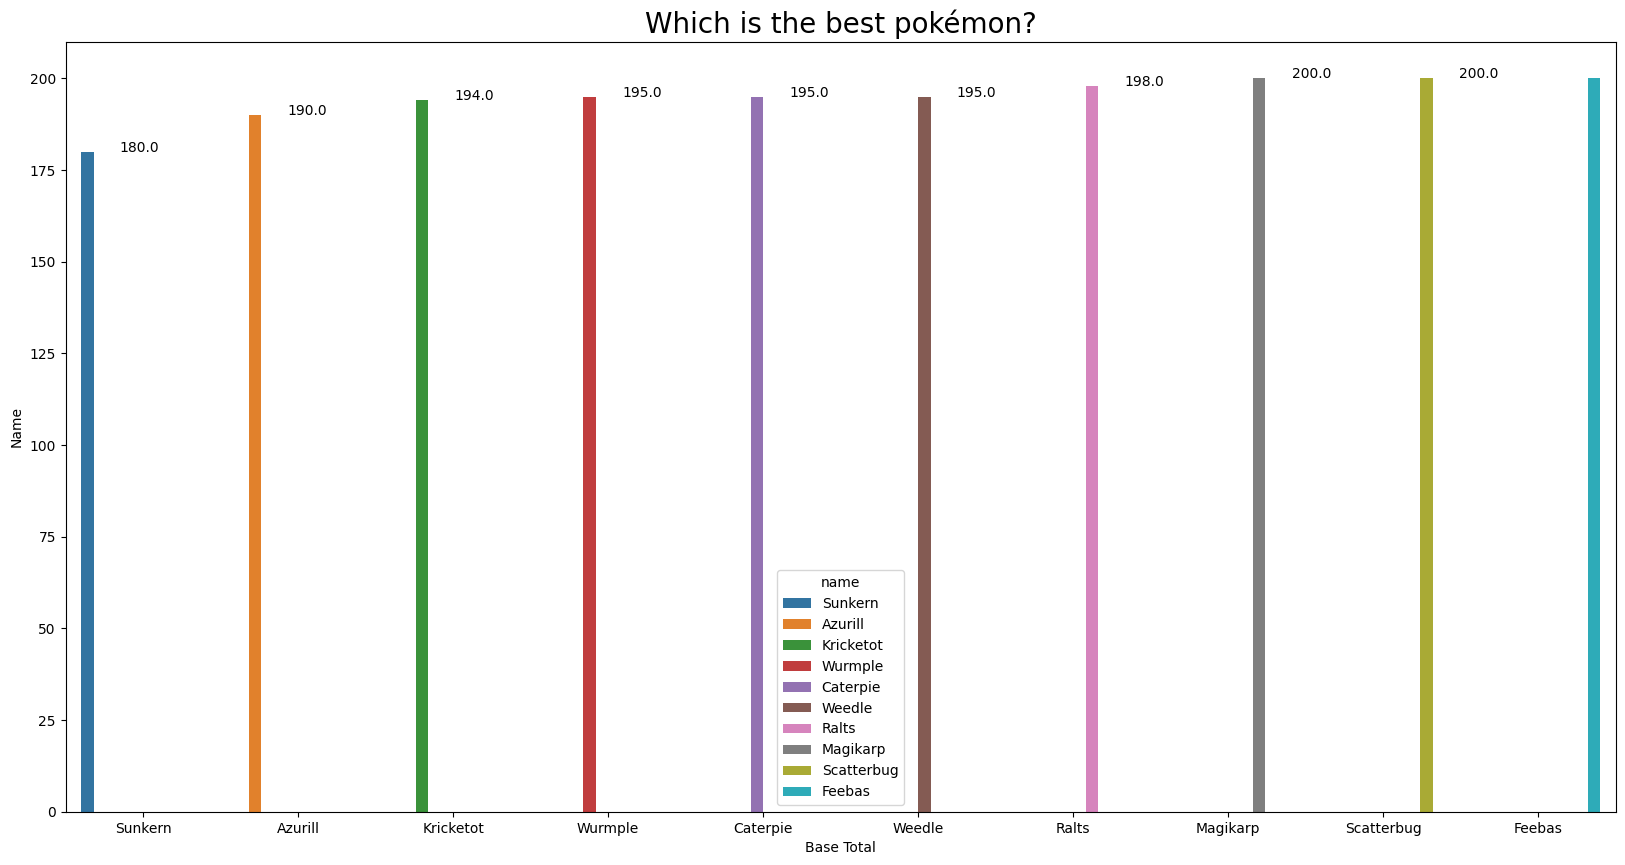

In [32]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=True).reset_index()[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v', hue=top10_pokemon_base_total["name"])
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<i>So, the weakest pokemon is <b>Sunkern</b>, followed by <b>Azurill, Kricketot</b>, and others.

### 10. Count of legendary pokemons

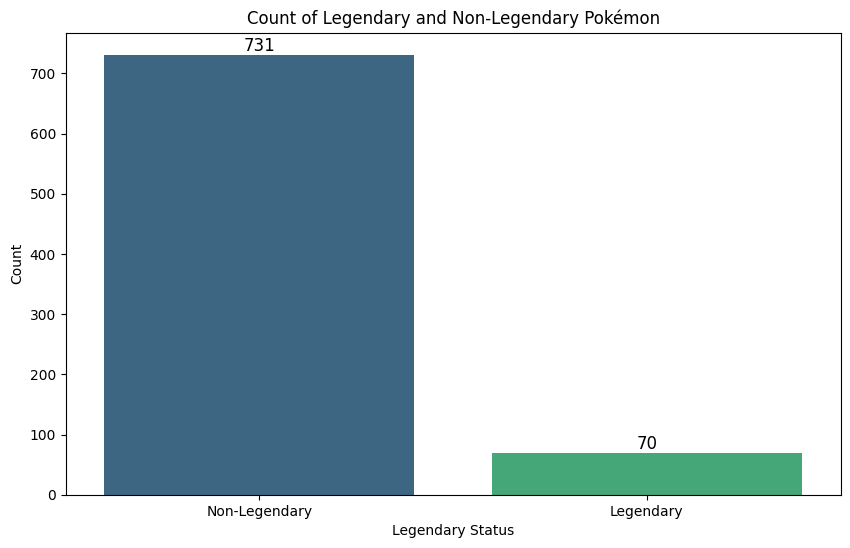

In [33]:
legendary_counts = df['is_legendary'].value_counts()

plt.figure(figsize=(10, 6))
bar = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Count of Legendary and Non-Legendary Pokémon')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])

for i in range(len(legendary_counts)):
    bar.text(i, legendary_counts.values[i] + 0.1, legendary_counts.values[i], ha='center', va='bottom', fontsize=12)

plt.show()

### 11. What is the most common type among legendary pokemons?

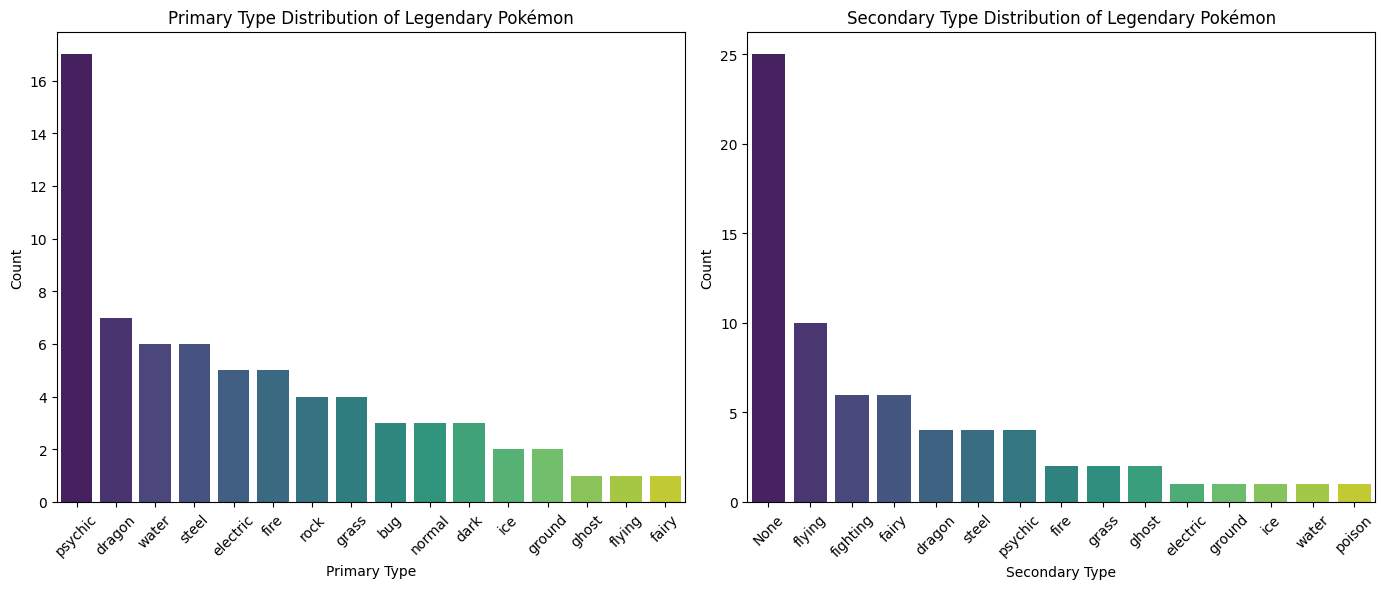

In [34]:
# Filter for legendary Pokémon
legendary_pokemon = df[df['is_legendary']==1]

# Count primary and secondary types
primary_type_counts = legendary_pokemon['primary type'].value_counts()
secondary_type_counts = legendary_pokemon['secondary type'].value_counts(dropna=False)

# Plot the distribution of primary types
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=primary_type_counts.index, y=primary_type_counts.values, palette="viridis")
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Primary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Plot the distribution of secondary types
plt.subplot(1, 2, 2)
sns.barplot(x=secondary_type_counts.index, y=secondary_type_counts.values, palette="viridis")
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.title('Secondary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

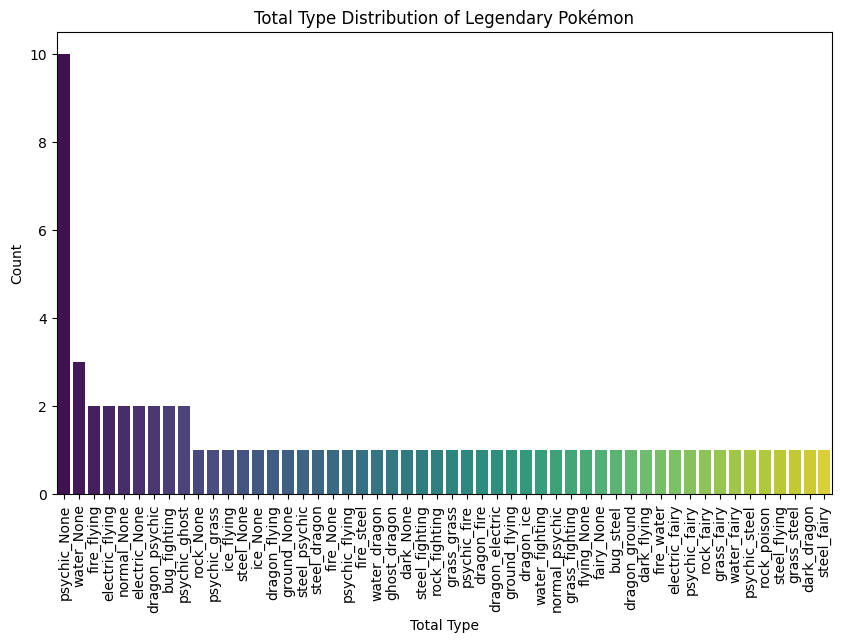

In [35]:
# Filter for legendary Pokémon
legendary_pokemon = df[df['is_legendary'] == 1]

# Count occurrences of each total type
total_type_counts = legendary_pokemon['type'].value_counts()

# Plot the distribution of total types
plt.figure(figsize=(10, 6))
sns.barplot(x=total_type_counts.index, y=total_type_counts.values, palette="viridis")
plt.xlabel('Total Type')
plt.ylabel('Count')
plt.title('Total Type Distribution of Legendary Pokémon')
plt.xticks(rotation=90)

# Display the plot
plt.show()

<i> From above plots, we can derive multiple conclusions:<p>
* If a pokemon have primary type as <b>"psychic"</b> then it has a very high chance of being a legendary pokemon.
* If a pokemon have secondary type as <b>"flying"</b> then it has a very high chance of being a legendary pokemon.
* If a pokemon have primary and secondary type as follows then it has a good chance of being a legendary pokemon as well:
    * Dragon and Psychic type
    * Fire and Flying type
    * Electric and Flying type
    * Psychic and Ghost type
    * Bug anf Fighting type
 

# Classifying Legendary or not?

<h4>Selecting Features

In [36]:
featured_df = df[['attack', 'base_egg_steps', 'base_total','defense', 'experience_growth',
                  'height_m','hp', 'weight_kg','sp_attack','sp_defense','speed','tot_abilities',
                  'is_legendary']]
featured_df.head()

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,49,5120,318,49,1059860,0.7,45,6.9,65,65,45,27,0
1,62,5120,405,63,1059860,1.0,60,13.0,80,80,60,27,0
2,100,5120,625,123,1059860,2.0,80,100.0,122,120,80,27,0
3,52,5120,309,43,1059860,0.6,39,8.5,60,50,65,24,0
4,64,5120,405,58,1059860,1.1,58,19.0,80,65,80,24,0


<h4>Splitting the data into train & test sets

In [37]:
X = featured_df.drop("is_legendary", axis=1)    # predictors
y = featured_df["is_legendary"]                 # target

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set:\t{len(y_train)}")
print(f"Test set:\t{len(y_test)}")

Train set:	640
Test set:	161


<h4>Standardize features

In [38]:
# Standardize features
scaler = StandardScaler()

# Fit on training data
X_train = scaler.fit_transform(X_train)

# Apply transform to validation and test data
X_test = scaler.transform(X_test)

<h4>Model fitting and testing

In [39]:
# Initialize models
classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(),
    'Linear SVM': LinearSVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    'XGBoost': XGBClassifier()
}


# Loop through each classifier
for name, clf in classifiers.items():
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict on the test set for final evaluation
    y_test_pred = clf.predict(X_test)
    
    # Evaluate performance on test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    # Print results
    print(f"Algorithm: {name}")
    print("Test Set Results:")
    print(f"Accuracy: {test_accuracy:.2f}")
    print(test_report)
    print("="*55)

Algorithm: Gradient Boosting
Test Set Results:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.95      1.00      0.97        18

    accuracy                           0.99       161
   macro avg       0.97      1.00      0.98       161
weighted avg       0.99      0.99      0.99       161

Algorithm: Random Forest
Test Set Results:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       143
           1       1.00      0.89      0.94        18

    accuracy                           0.99       161
   macro avg       0.99      0.94      0.97       161
weighted avg       0.99      0.99      0.99       161

Algorithm: AdaBoost
Test Set Results:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.95      1.00      0.97        18

    accur

<i>FOllowing is the comparison of models and their metrics such as accuracy, precision, recall, and F1-score.<p>
    <table>
  <thead>
    <tr>
      <th rowspan="2">Algorithm</th>
      <th rowspan="2">Accuracy</th>
      <th colspan="2">Precision</th>
      <th colspan="2">Recall</th>
      <th colspan="2">F1-score</th>
    </tr>
    <tr>
      <th>Class 0</th>
      <th>Class 1</th>
      <th>Class 0</th>
      <th>Class 1</th>
      <th>Class 0</th>
      <th>Class 1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Gradient Boosting</td>
      <td>0.99</td>
      <td>1.00</td>
      <td>0.95</td>
      <td>0.99</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.97</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>AdaBoost</td>
      <td>0.99</td>
      <td>1.00</td>
      <td>0.95</td>
      <td>0.99</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.97</td>
    </tr>
    <tr>
      <td>Support Vector Machine</td>
      <td>0.98</td>
      <td>0.97</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.78</td>
      <td>0.99</td>
      <td>0.88</td>
    </tr>
    <tr>
      <td>Linear SVM</td>
      <td>0.98</td>
      <td>0.98</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.83</td>
      <td>0.99</td>
      <td>0.91</td>
    </tr>
    <tr>
      <td>K-Nearest Neighbors</td>
      <td>0.98</td>
      <td>0.98</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.83</td>
      <td>0.99</td>
      <td>0.91</td>
    </tr>
    <tr>
      <td>Gaussian Naive Bayes</td>
      <td>0.98</td>
      <td>0.99</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.89</td>
    </tr>
    <tr>
      <td>Decision Tree</td>
      <td>0.98</td>
      <td>0.99</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.94</td>
      <td>0.99</td>
      <td>0.92</td>
    </tr>
    <tr>
      <td>Logistic Regression</td>
      <td>0.98</td>
      <td>0.98</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.83</td>
      <td>0.99</td>
      <td>0.91</td>
    </tr>
    <tr>
      <td>Stochastic Gradient Descent</td>
      <td>0.96</td>
      <td>0.97</td>
      <td>0.82</td>
      <td>0.98</td>
      <td>0.78</td>
      <td>0.98</td>
      <td>0.80</td>
    </tr>
    <tr>
      <td>Neural Network</td>
      <td>0.98</td>
      <td>0.99</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.89</td>
    </tr>
    <tr>
      <td>XGBoost</td>
      <td>0.98</td>
      <td>0.99</td>
      <td>0.94</td>
      <td>0.99</td>
      <td>0.89</td>
      <td>0.99</td>
      <td>0.91</td>
    </tr>
  </tbody>
</table>


# END of Notebook

***